In [95]:
import numpy as np
import matplotlib.pyplot as plt

height = 5001
width = 5001
r=10
min_step_size=1
max_moves = 100000
greade_tree = 0
greade_move = 0
greade_toofar = 0

In [96]:
def point_generator(tree):
    center = np.mean(tree, axis=0)
    distances = np.sqrt(np.sum((tree - center)**2, axis=1))
    max_dist = np.max(distances)

    # Spawn on a circle outside the current tree
    radius = max_dist * 1.2+10
    angle = np.random.uniform(0, 2*np.pi)  # random angle every time

    y = int(center[0] + radius * np.sin(angle))
    x = int(center[1] + radius * np.cos(angle))

    return np.array([[y, x]])

def point_movement(new_point, min_step_size, tree):
    moved_points = []
    for point in new_point:
        y, x = point
        min_distance = np.min(np.sqrt(np.sum((tree - point)**2, axis=1)))
        step_size = max(min_step_size, min_distance - r)
        angle = np.random.uniform(0, 2*np.pi)
        dx = round(step_size * np.cos(angle))
        dy = round(step_size * np.sin(angle))
        moved_points.append([y + dy, x + dx])
    return np.array(moved_points)

In [97]:
canvas = np.zeros((width,height, 3), dtype=np.uint8)
canvas[:] = [50, 50, 155]

tree = np.array([[height//2, width//2],])

new_point = np.empty((0, 2), dtype=int)
new_point = np.vstack([new_point,point_generator(tree)])

too_far_threshold = 20 

In [ ]:
for move_count in range(max_moves): 
    distances = np.sqrt(((new_point[:, None, :] - tree[None, :, :])**2).sum(axis=2))
    min_distances = np.min(distances, axis=1)

    mask_add = (min_distances <= r)
    mask_remove = (min_distances > too_far_threshold)

    if np.any(mask_add): 
        selected_points = new_point[mask_add]
        tree = np.vstack([tree, selected_points]) 
        new_point = new_point[~mask_add]
        greade_tree += np.sum(mask_add)
            
        # Recalculate thresholds dynamically
        center = np.mean(tree, axis=0)
        distances_from_center = np.sqrt(np.sum((tree - center) ** 2, axis=1)) 
        max_dist = np.max(distances_from_center) 
        too_far_threshold = 40 + max_dist * 1.4

        # Spawn the next new point 
        while round(len(tree)/500) > len(new_point):
            new_point = np.vstack([new_point, point_generator(tree)])
        

    elif np.all(mask_remove):  
        new_point = new_point[~mask_remove]
        new_point = np.vstack([new_point, point_generator(tree)])
        greade_toofar += np.sum(mask_remove)

    else: 
        new_point = point_movement(new_point,min_step_size,tree) 
        greade_move += 1


C:\Users\halfd\AppData\Local\Temp\ipykernel_23528\455238697.py:2: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(((new_point[:, None, :] - tree[None, :, :])**2).sum(axis=2))
C:\Users\halfd\AppData\Local\Temp\ipykernel_23528\687952631.py:19: RuntimeWarning: invalid value encountered in sqrt
  min_distance = np.min(np.sqrt(np.sum((tree - point)**2, axis=1)))


1266 197923 824 3


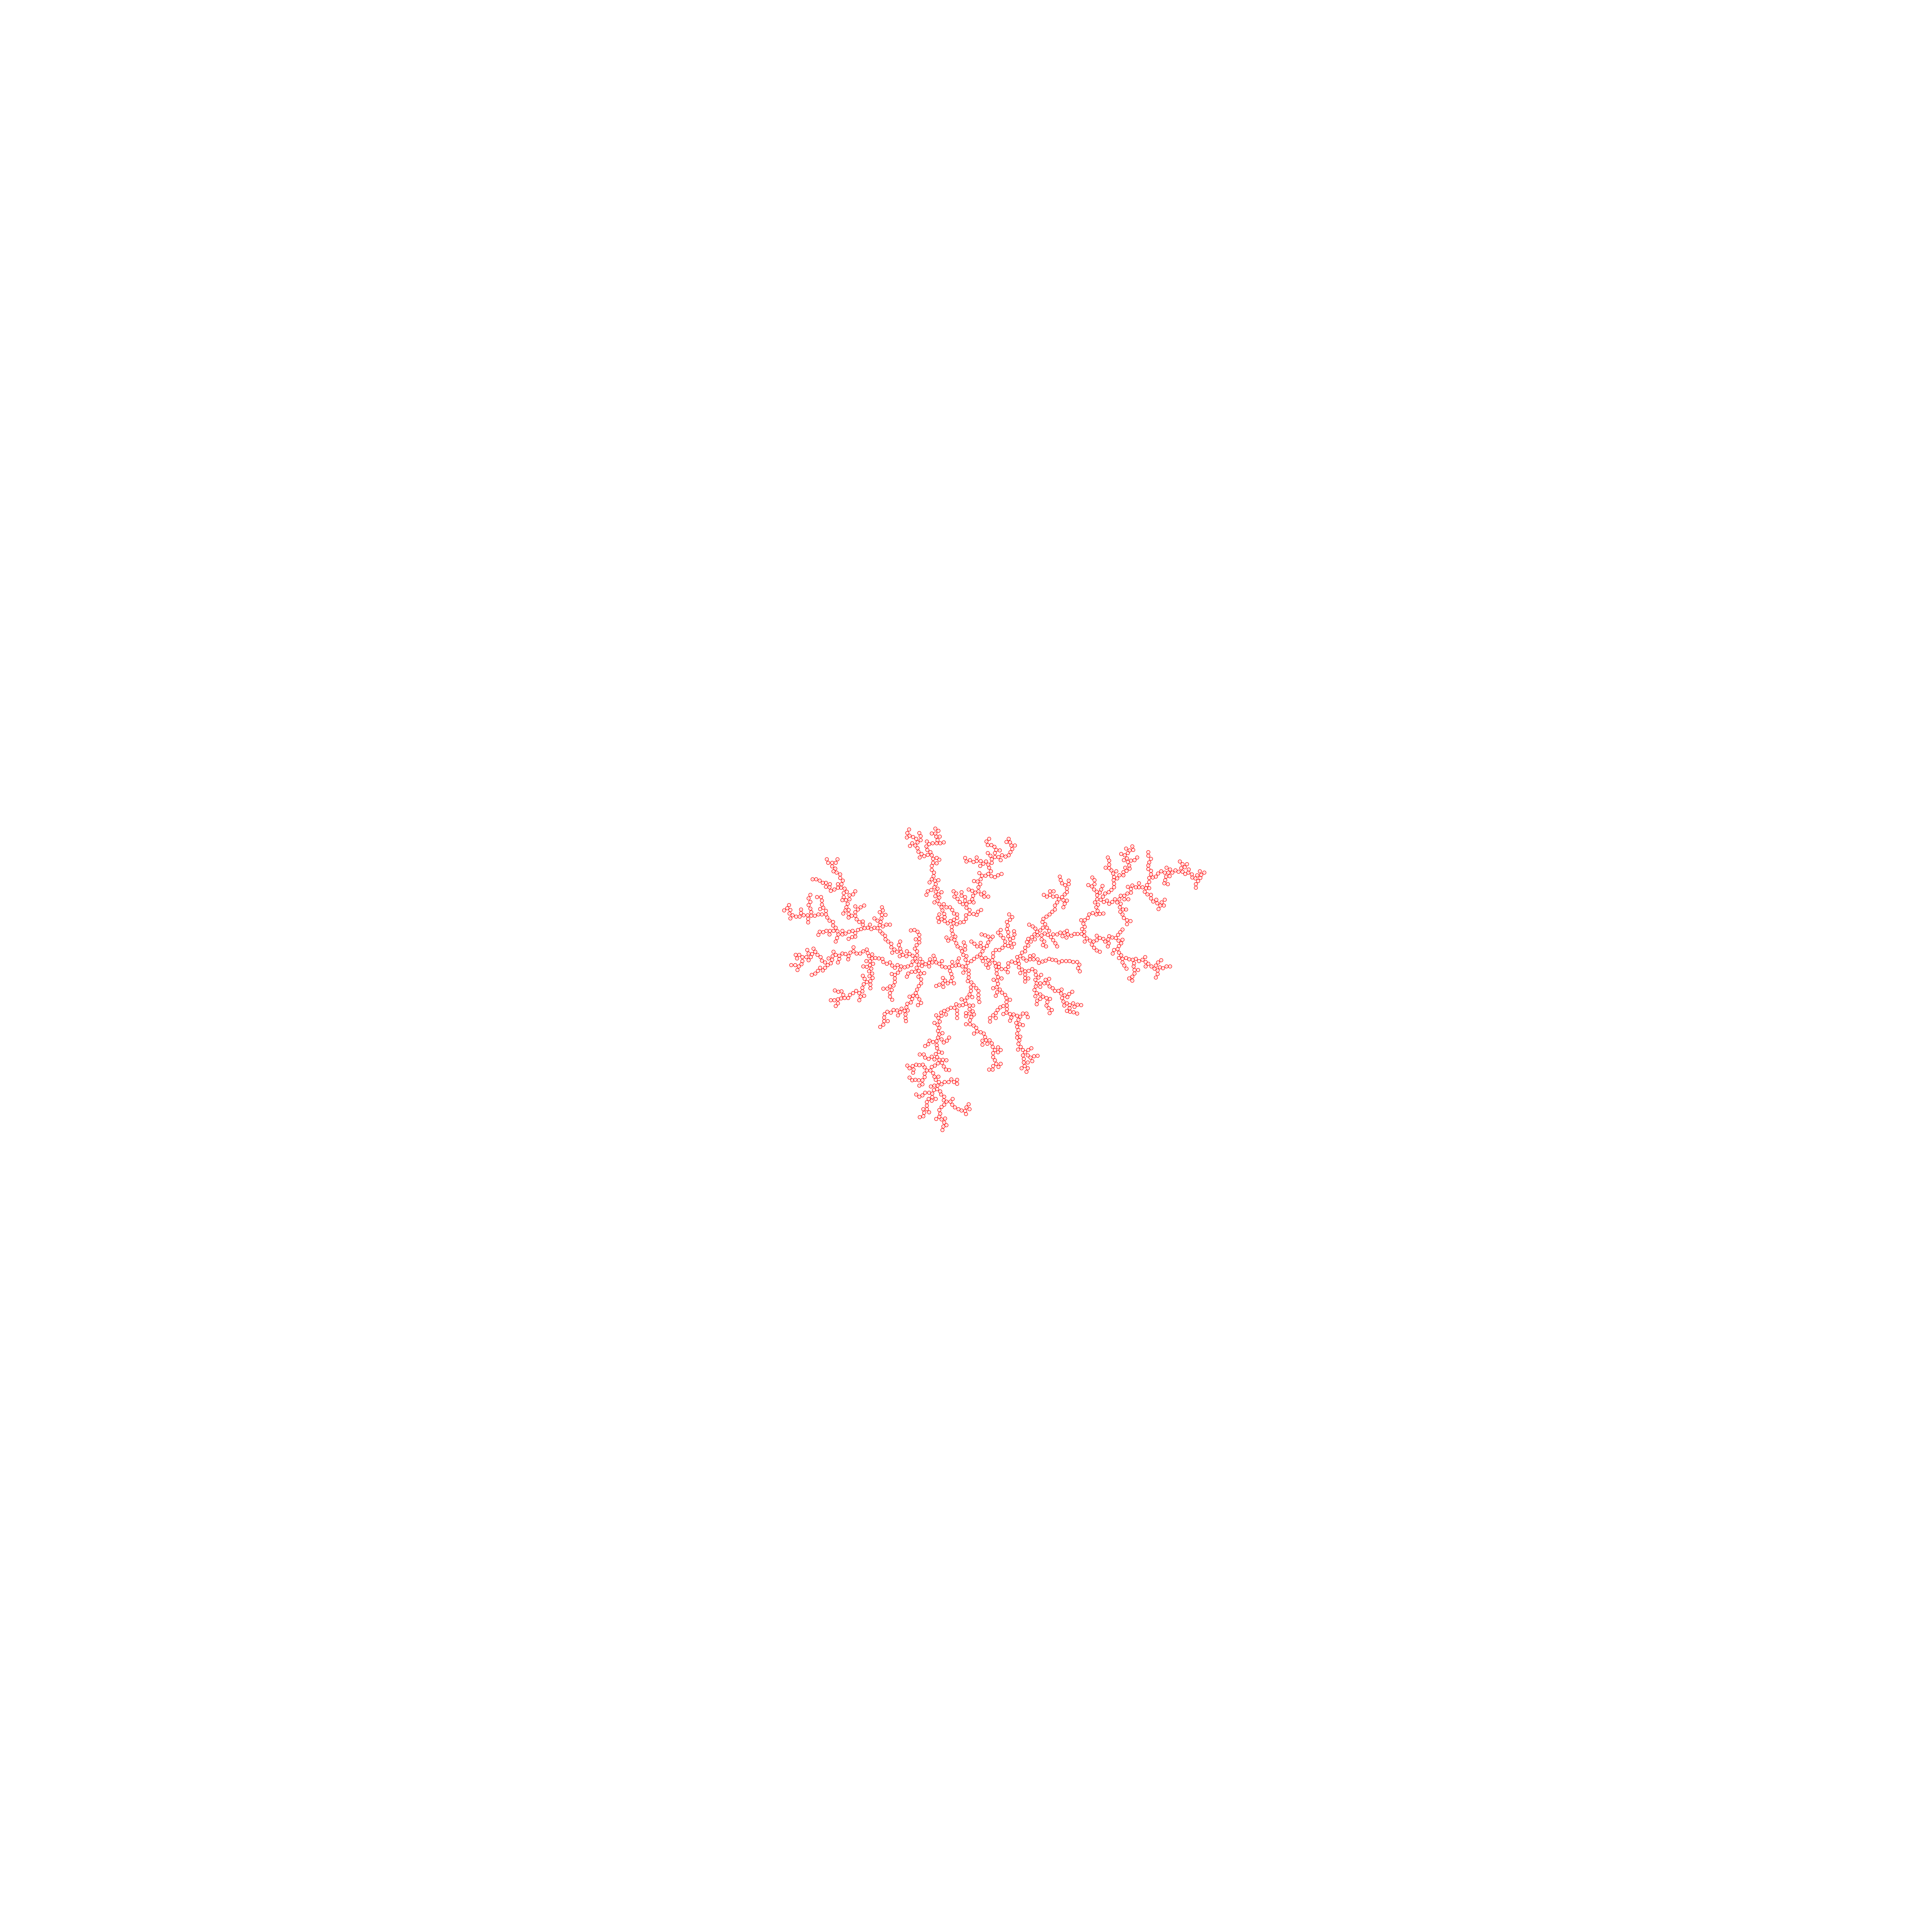

In [102]:
print(greade_tree, greade_move, greade_toofar,len(new_point))

S=0.02

plt.figure(figsize=(S*width/10, S*height/10), dpi=550)
plt.xlim(0, width)
plt.ylim(0, height)
plt.scatter(tree[:, 0], tree[:, 1], s=S, c='red', alpha=1)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()